https://www.kaggle.com/code/parsasam/reinforcement-learning-notes-multi-armed-bandits/notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
k = 10
num_problems = 2000

q_star = np.random.normal(0, 1, (num_problems,k))
arms = [0] * k

for i in range(10):
    arms[i] = np.random.normal(q_star[0, i], 1, 2000) # first problem as a sample

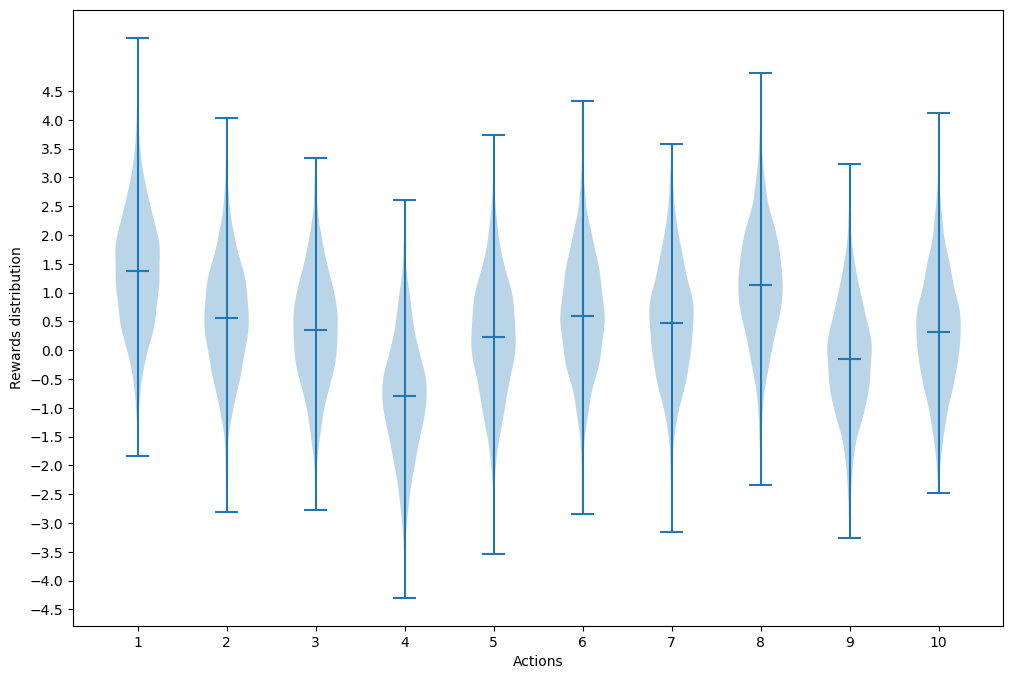

In [3]:
plt.figure(figsize=(12,8))
plt.ylabel('Rewards distribution')
plt.xlabel('Actions')
plt.xticks(range(1,11))
plt.yticks(np.arange(-5,5,0.5))

plt.violinplot(arms, positions=range(1,11), showmedians=True)
plt.show()

In [4]:
def bandit(action, problem):
    return np.random.normal(q_star[problem, action], 1)

In [5]:
def simple_max(Q, N, t):
#     return np.argmax(Q)
    return np.random.choice(np.flatnonzero(Q == Q.max())) # breaking ties randomly

In [6]:
def simple_bandit(k, epsilon, steps, initial_Q, alpha=0, argmax_func=simple_max):
    rewards = np.zeros(steps)
    actions = np.zeros(steps)
    
    for i in tqdm(range(num_problems)):
        Q = np.ones(k) * initial_Q # initial Q
        N = np.zeros(k)  # initalize number of rewards given
        best_action = np.argmax(q_star[i])
        for t in range(steps):
            if np.random.rand() < epsilon: # explore
                a = np.random.randint(k)
            else: # exploit
                a = argmax_func(Q, N, t)

            reward = bandit(a, i)

            N[a] += 1
            if alpha > 0:
                Q[a] = Q[a] + (reward - Q[a]) * alpha
            else:
                Q[a] = Q[a] + (reward - Q[a]) / N[a]

            rewards[t] += reward
            
            if a == best_action:
                actions[t] += 1
    
    return np.divide(rewards,num_problems), np.divide(actions,num_problems)

In [7]:
ep_0, ac_0 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=0)
ep_01, ac_01 = simple_bandit(k=10, epsilon=0.01, steps=1000, initial_Q=0)
ep_1, ac_1 = simple_bandit(k=10, epsilon=0.1, steps=1000, initial_Q=0)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:26<00:00, 23.18it/s]


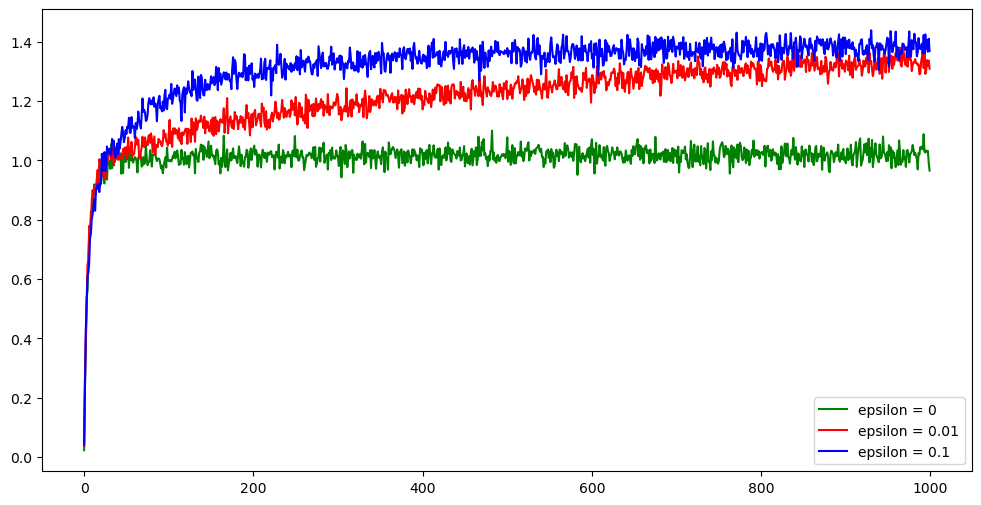

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ep_0, 'g', label='epsilon = 0')
plt.plot(ep_01, 'r', label='epsilon = 0.01')
plt.plot(ep_1, 'b', label='epsilon = 0.1')
plt.legend() 
plt.show()

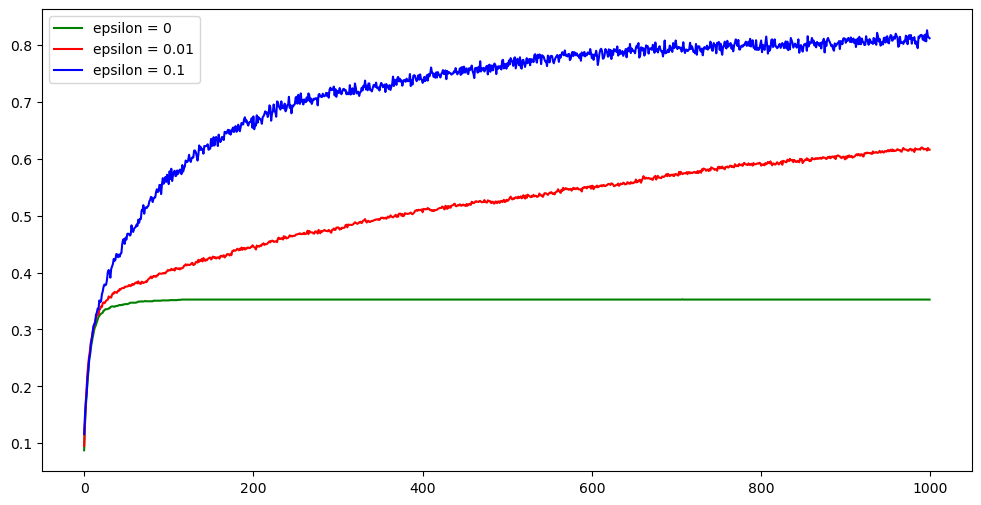

In [9]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,1,0.1))
plt.plot(ac_0, 'g', label='epsilon = 0')
plt.plot(ac_01, 'r', label='epsilon = 0.01')
plt.plot(ac_1, 'b', label='epsilon = 0.1')
plt.legend() 
plt.show()

In [10]:
def ucb(Q, N, t):
    c = 2
    if N.min() == 0:
        return np.random.choice(np.flatnonzero(N == N.min()))
    
    M = Q + c * np.sqrt(np.divide(np.log(t),N))
    return np.argmax(M) # breaking ties randomly

In [11]:
ucb_2, ac_ucb_2 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=0, argmax_func=ucb)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:55<00:00, 36.33it/s]


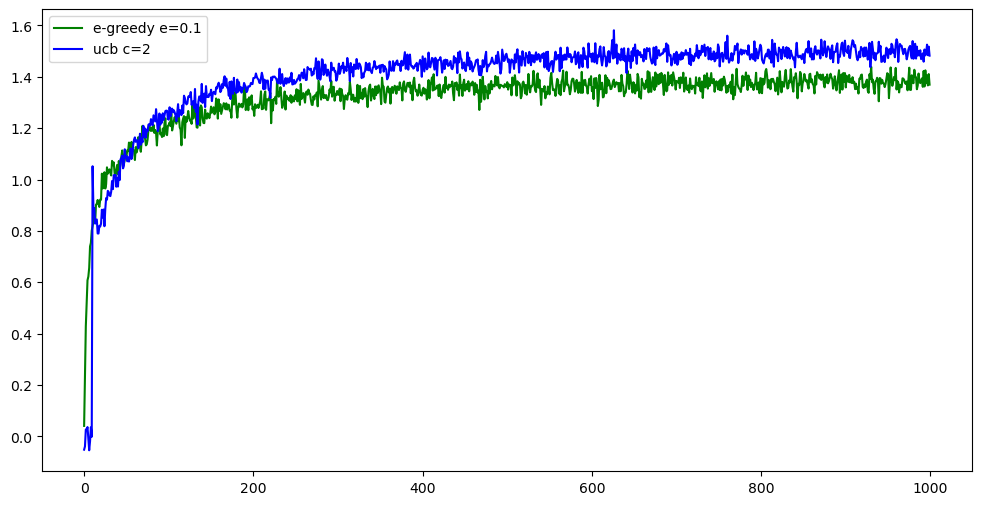

In [12]:
plt.figure(figsize=(12,6))
plt.plot(ep_1, 'g', label='e-greedy e=0.1')
plt.plot(ucb_2, 'b', label='ucb c=2')
plt.legend() 
plt.show()